In [4]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
#from utils.text_cleaning import *

<h3> Text preprocessing </h3>

In [35]:
arxiv_papers = pd.read_csv('data/arxiv_data.csv')

In [36]:
arxiv_papers

,titles,summaries,terms
0,Survey on Semantic Stereo Matching / Semantic ...,Stereo matching is one of the widely used tech...,"['cs.CV', 'cs.LG']"
1,FUTURE-AI: Guiding Principles and Consensus Re...,The recent advancements in artificial intellig...,"['cs.CV', 'cs.AI', 'cs.LG']"
2,Enforcing Mutual Consistency of Hard Regions f...,"In this paper, we proposed a novel mutual cons...","['cs.CV', 'cs.AI']"
3,Parameter Decoupling Strategy for Semi-supervi...,Consistency training has proven to be an advan...,['cs.CV']
4,Background-Foreground Segmentation for Interio...,"To ensure safety in automated driving, the cor...","['cs.CV', 'cs.LG']"
...,...,...,...
51769,Hierarchically-coupled hidden Markov models fo...,We address the problem of analyzing sets of no...,"['stat.ML', 'physics.bio-ph', 'q-bio.QM']"
51770,Blinking Molecule Tracking,We discuss a method for tracking individual mo...,"['cs.CV', 'cs.DM']"
51771,Towards a Mathematical Foundation of Immunolog...,We attempt to set a mathematical foundation of...,"['stat.ML', 'cs.LG', 'q-bio.GN']"
51772,A Semi-Automatic Graph-Based Approach for Dete...,Diffusion Tensor Imaging (DTI) allows estimati...,['cs.CV']


In [37]:
arxiv_papers = arxiv_papers[:1000]

In [38]:
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if w not in stop_words]
    return ' '.join(no_stopword_text)

def clean_text(text):
    text = text.lower()
    text = re.sub("[^a-zA-Z]"," ",text) 
    text = ' '.join(text.split()) 
    return text

In [39]:
from nltk.tag import StanfordPOSTagger

jar = 'stanford-postagger.jar'
model = 'english-left3words-distsim.tagger'

stg = StanfordPOSTagger(path_to_jar=jar, model_filename=model)

In [40]:
from nltk.corpus.reader.wordnet import VERB, NOUN, ADJ, ADV
dict_pos_map = {
    'NN': NOUN,
    'JJ' : ADJ  
}

In [41]:
from nltk import WordNetLemmatizer

lm = WordNetLemmatizer()
adjectives = []
def lemmatizer_on_text(data):    
    data = stg.tag(data) 
    text = []
    for i in range(len(data)):
        if data[i][1] == 'JJ':
            adjectives.append(data[i][0])
        if dict_pos_map.get(data[i][1][:2]) != None:
                text.append(lm.lemmatize(data[i][0], dict_pos_map[data[i][1][:2]]))
    return text

In [42]:
arxiv_papers['summaries'] = arxiv_papers['summaries'].apply(lambda x: clean_text(x))
arxiv_papers['summaries'] = arxiv_papers['summaries'].apply(lambda x: remove_stopwords(x))

C:\Users\Марія\AppData\Local\Temp\ipykernel_15124\2012492338.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arxiv_papers['summaries'] = arxiv_papers['summaries'].apply(lambda x: clean_text(x))
C:\Users\Марія\AppData\Local\Temp\ipykernel_15124\2012492338.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arxiv_papers['summaries'] = arxiv_papers['summaries'].apply(lambda x: remove_stopwords(x))


In [43]:
arxiv_papers_splitted = arxiv_papers['summaries'].apply(lambda x: x.split())

In [44]:
from nltk import WordNetLemmatizer

lm = WordNetLemmatizer()
adjectives = []
def lemmatizer_on_text(data):    
    data = stg.tag(data) 
    text = []
    for i in range(len(data)):
        if data[i][1] == 'JJ':
            adjectives.append(data[i][0])
        if dict_pos_map.get(data[i][1][:2]) != None:
                text.append(lm.lemmatize(data[i][0], dict_pos_map[data[i][1][:2]]))
    return text

In [46]:
arxiv_papers_lemmatized = arxiv_papers_splitted.apply(lambda x: lemmatizer_on_text(x))

In [48]:
arxiv_papers_splitted = arxiv_papers_lemmatized

In [49]:
arxiv_papers['summaries'] =  arxiv_papers_splitted.apply(lambda x: " ".join(x))

C:\Users\Марія\AppData\Local\Temp\ipykernel_15124\327545699.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arxiv_papers['summaries'] =  arxiv_papers_splitted.apply(lambda x: " ".join(x))


<h3> TF-IDF </h3>

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_tf_idf = vectorizer.fit_transform(arxiv_papers['summaries'])

<h3> Doc2Vec </h3>

In [47]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
tagged_data = [TaggedDocument(d, [i]) for i, d in enumerate(arxiv_papers_splitted)]

model = Doc2Vec(tagged_data, vector_size = 700, window = 2, min_count = 1, epochs = 500)

In [48]:
model.infer_vector(arxiv_papers_splitted[0])

array([-7.74769634e-02,  3.37024391e-01,  5.65633655e-01,  6.56655312e-01,
       -4.67886150e-01, -5.96236169e-01, -5.88204920e-01,  9.02611971e-01,
       -3.43572348e-02, -7.07364202e-01, -7.90991247e-01,  7.07045570e-02,
       -8.33707035e-01, -2.38735288e-01, -1.01957572e+00, -2.84594983e-01,
        5.67390025e-01,  1.47415146e-01, -2.96489447e-01, -2.57845610e-01,
       -4.02760431e-02,  1.10185295e-01, -5.20503342e-01, -3.72812927e-01,
       -4.22242135e-01, -2.53515810e-01, -2.45146856e-01, -1.28096178e-01,
        7.78497458e-01,  6.20649636e-01,  8.09073821e-02, -1.10123253e+00,
        1.07910827e-01,  4.49641407e-01,  2.84797460e-01,  1.13173294e+00,
        4.99541789e-01, -8.76918912e-01, -6.62268996e-01,  4.75137860e-01,
        8.32601547e-01,  8.29318166e-01, -1.09297715e-01,  1.50702894e-01,
        1.13387465e+00, -5.09632170e-01,  3.92347038e-01, -5.09224713e-01,
       -4.92954589e-02,  1.78278491e-01, -3.70467961e-01, -6.38783038e-01,
       -4.99332935e-01, -

<h3> Word2Vec </h3>

In [122]:
max_len = 0
for i in arxiv_papers_splitted:
    if len(i) > max_len:
        max_len = len(i)

In [124]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

tokenizer=Tokenizer()
tokenizer.fit_on_texts(arxiv_papers['summaries'])
tokenized_documents=tokenizer.texts_to_sequences(arxiv_papers['summaries'])
tokenized_paded_documents=pad_sequences(tokenized_documents,maxlen=max_len,padding='post')
vocab_size = len(tokenizer.word_index) + 1
print(tokenized_paded_documents[0])

[ 785  536   61  205    6   77  243  449  785    2 1863  163  419  365
   61  413  957  251  397  264   56  468  440  582 1194  358   98  130
  264   43  265  274  515 2091 1195  334  413   45  785  536   73  144
  315   23  786    2    1    6   27   15  785  536   98   17   25    4
   37    5  266  414   23    1  785  536   24  283  702  390  456   31
   32    4  165   59  165  419  353  128  135   54   56    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0]

In [111]:
from gensim.models import Word2Vec as w2v

model_w2v = w2v(
    arxiv_papers_splitted 
)       

embedding_matrix=np.zeros((vocab_size,100))
for word,i in tokenizer.word_index.items():
    if word in model_w2v:
        embedding_matrix[i]=model_w2v[word]

document_word_embeddings=np.zeros((len(tokenized_paded_documents),197,100))
for i in range(len(tokenized_paded_documents)):
    for j in range(len(tokenized_paded_documents[0])):
        document_word_embeddings[i][j]=embedding_matrix[tokenized_paded_documents[i][j]]
document_word_embeddings.shape

C:\Users\Марія\AppData\Local\Temp\ipykernel_17172\1832094138.py:9: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  if word in model_w2v:
C:\Users\Марія\AppData\Local\Temp\ipykernel_17172\1832094138.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  embedding_matrix[i]=model_w2v[word]


(1000, 197, 100)

In [113]:
#tfidf_vectors=vectorizer.transform(arxiv_papers['summaries'])

document_embeddings=np.zeros((len(tokenized_paded_documents),100))
words=vectorizer.get_feature_names()
for i in range(len(document_word_embeddings)):
    for j in range(len(document_word_embeddings[i])):
        document_embeddings[i] += document_word_embeddings[i][j]#*tfidf_vectors[i][j]
    document_embeddings[i] = document_embeddings[i] / len(document_word_embeddings)

<h3> BERT </h3>

In [10]:
import torch
from transformers import BertTokenizer, BertModel

bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [19]:
prebert_docs = arxiv_papers['summaries'].apply(lambda x: "[CLS] " + x + " [SEP]")

In [20]:
prebert_docs

0      [CLS] stereo match one wide use techniqu infer...
1      [CLS] recent advanc artifici intellig ai combi...
2      [CLS] paper propos novel mutual consist networ...
3      [CLS] consist train proven advanc semi supervi...
4      [CLS] ensur safeti autom drive correct percept...
                             ...                        
995    [CLS] accur medic imag segment essenti diagnos...
996    [CLS] isointens stage accur volumetr imag segm...
997    [CLS] complex segment task fulli automat syste...
998    [CLS] low shot learn method imag classif suppo...
999    [CLS] semant imag segment import comput vision...
Name: summaries, Length: 1000, dtype: object

In [21]:
bert_docs  = prebert_docs.apply(lambda x: bert_tokenizer.tokenize(x))

In [22]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('distilbert-base-nli-mean-tokens')
embeddings = model.encode(bert_docs, show_progress_bar=True)

Batches:   0%|          | 0/32 [00:00<?, ?it/s]

In [23]:
embeddings[0]

array([-0.9001504 , -0.1923944 , -0.3314088 , -0.00542206, -0.50027484,
       -0.7925502 ,  0.6349969 ,  0.46893567, -0.38503575,  1.255507  ,
        0.6253959 ,  0.74420387,  0.2702955 , -0.18012801,  0.1473182 ,
       -0.5380218 ,  0.05832737,  0.23732433, -0.42837057, -0.35841185,
        0.29445767, -0.25914767, -0.2312975 ,  1.150772  , -0.5539219 ,
        0.1698472 ,  1.2156613 ,  0.11076261, -0.17989662, -0.2959482 ,
        0.44213533,  1.2829968 ,  0.53174245,  0.59939766,  0.74358165,
       -0.04720026, -0.04213877, -0.5826794 ,  0.31136245, -0.19812906,
        0.6966152 ,  0.3127091 ,  0.1544398 , -0.6848373 , -0.6933682 ,
        0.9804041 , -1.7555034 ,  0.54483455, -1.9538212 , -0.93046856,
       -0.6505855 ,  0.36982125,  1.6868384 , -0.37338293, -1.1974249 ,
       -0.21531716, -1.6789265 ,  0.634575  ,  0.25031886,  0.27878395,
        0.16680112,  0.10418699,  0.06515896, -0.8640729 , -0.06907883,
       -0.02336732,  0.9174653 ,  0.73995674,  0.42423338, -0.46

<h3> LDA </h3>

<h4> Additional text cleaning </h4>

In [58]:
def replace_ngram(x, ngram_array):
    for gram in ngram_array:
        x = x.replace(gram, '_'.join(gram.split()))
    return x

In [78]:
vocab = set()
words_frequences = {}

In [55]:
import nltk

bigram_measures = nltk.collocations.BigramAssocMeasures()
finder =nltk.collocations.BigramCollocationFinder.from_documents(arxiv_papers_splitted)
finder.apply_freq_filter(30)
bigram_scores = finder.score_ngrams(bigram_measures.pmi)
bigrams = [" ".join(list(bigram[0])) for bigram in bigram_scores]
bigram_scores = bigram_scores[:30]
bigram_scores

[(('magnetic', 'resonance'), 11.124833798842655),
 (('intersection', 'union'), 11.016158137061707),
 (('pascal', 'voc'), 10.5831987297856),
 (('github', 'com'), 9.86767595934553),
 (('http', 'github'), 9.682875000248522),
 (('ground', 'truth'), 9.678769403943186),
 (('long', 'range'), 9.419422938551294),
 (('real', 'world'), 8.761947581614917),
 (('computer', 'vision'), 8.570915568059284),
 (('encoder', 'decoder'), 8.528007476330655),
 (('active', 'contour'), 8.404430396023695),
 (('recent', 'year'), 8.328619434390252),
 (('available', 'http'), 8.161309753760445),
 (('u', 'net'), 8.025769671313553),
 (('attention', 'mechanism'), 7.904725169341329),
 (('time', 'consuming'), 7.899758956452885),
 (('random', 'field'), 7.758051468171033),
 (('end', 'end'), 7.597023743143673),
 (('experimental', 'result'), 7.578428051922758),
 (('state', 'art'), 7.534444011394136),
 (('extensive', 'experiment'), 7.49123084575157),
 (('multi', 'modal'), 7.470038350892951),
 (('loss', 'function'), 7.229712884

In [57]:
from collections import Counter

trigrams = []
whole_text = []
for abstract in arxiv_papers_splitted:
    whole_text = whole_text + abstract

ngrams = Counter(nltk.ngrams(whole_text, 3))

for ngram, freq in ngrams.most_common(11):
    trigrams.append(" ".join(ngram))
trigrams

['medical image segmentation',
 'convolutional neural network',
 'deep neural network',
 'semantic image segmentation',
 'image segmentation task',
 'state art method',
 'image segmentation method',
 'http github com',
 'state art performance',
 'available http github',
 'neural network cnns']

In [59]:
tokenized_docs = arxiv_papers_splitted.apply(lambda x : " ".join(word for word in x))
tokenized_docs = tokenized_docs.apply(lambda x: replace_ngram(x, bigrams))
tokenized_docs = tokenized_docs.apply(lambda x: replace_ngram(x, trigrams))
tokenized_docs = tokenized_docs.apply(lambda x: x.split())

In [71]:
tokenized_docs

0      [stereo, technique, depth, stereo, image, robu...
1      [recent, advancement, artificial, intelligence...
2      [paper_novel, mutual, consistency, network, mc...
3      [consistency, training, proven, advanced, semi...
4      [safety, correct, perception, situation, car, ...
                             ...                        
995    [accurate, medical_image_segmentation, essenti...
996    [isointense, stage, accurate, volumetric, imag...
997    [complex, segmentation_task, automatic, system...
998    [low, shot, method_image_classification, suppo...
999    [semantic_image_segmentation, important, compu...
Name: summaries, Length: 1000, dtype: object

In [82]:
vocab2 = set()

In [83]:
def form_vocab():
    vocab2.clear()
    for i in tokenized_docs:
        for j in i:
            vocab2.add(j)

In [84]:
form_vocab()

In [87]:
import pandas as pd

d = {i : [] for i in list(vocab2)}
data = pd.DataFrame(d)

for doc in tokenized_docs:
    data = data.append({i : doc.count(i) for i in list(vocab2)}, ignore_index=True)
data = data.transpose()
data.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
glaucoma,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
caption,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aperture,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
patient,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
unstable,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
def calc_frequences():
    words_frequences = dict.fromkeys(list(vocab2), 0)
    for word in list(vocab2):
        for i in data.loc[[word], :].sum():
            words_frequences[word] += i
    words_frequences = {k: v for k, v in sorted(words_frequences.items(), key=lambda item: item[1], reverse=True)}
    return words_frequences

In [89]:
words_frequences = calc_frequences()

In [90]:
import matplotlib.pyplot as plt

def show_plot(a, b):
    fig, ax = plt.subplots(figsize=(16,8))
    x = list(words_frequences.keys())[a:b]
    y = list( words_frequences.values())[a:b]
    ax.bar(range(len(x)), y)
    ax.set_xticks(range(len(x)))
    ax.set_xticklabels(x, rotation='vertical')
    ax.set_title('Words frequences (excluding stop words)')
    ax.set_xlabel('Word');
    ax.set_ylabel('Number of occurences');
    plt.show()

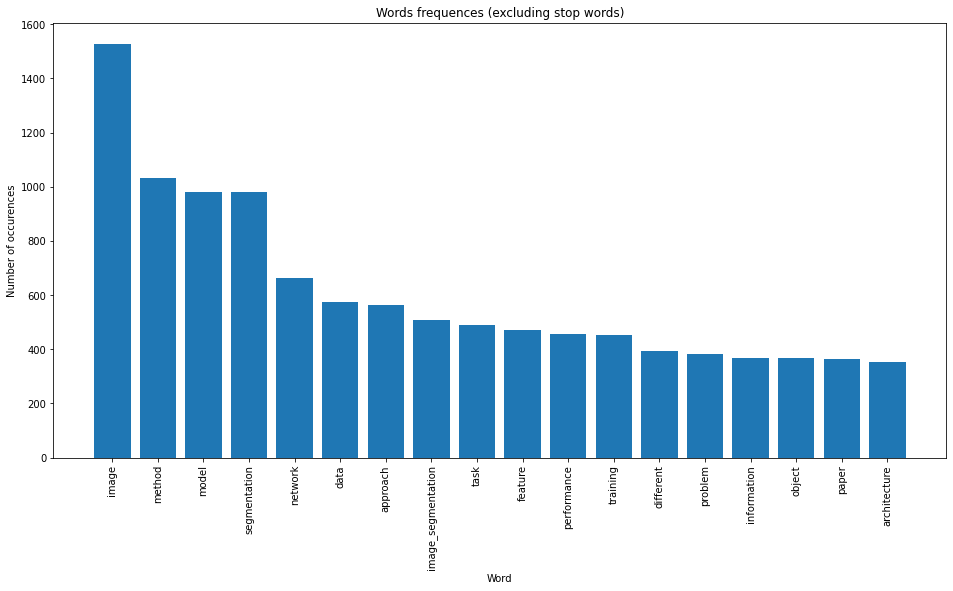

In [91]:
show_plot(0, 18)

In [92]:
number_of_docs =  len(data.columns)
upper_percent = 50
lower_percent = 2

In [93]:
remove_words = set()

In [94]:
for word in words_frequences.keys():
    if words_frequences[word] >= number_of_docs * upper_percent / 100 or words_frequences[word] <= number_of_docs * lower_percent / 100:
        remove_words.add(word)

In [98]:
len(remove_words)

5189

In [96]:
len(vocab2)

5700

In [97]:
remove_words.update(adjectives)

In [100]:
tokenized_docs_save = tokenized_docs.copy()

In [101]:
for i in range(len(tokenized_docs)):
    for j in remove_words:
        tokenized_docs[i] = list(filter(lambda a: a != j, tokenized_docs[i]))
tokenized_docs

0      [technique, depth, robustness, speed, research...
1      [system, development, imaging, solution, value...
2      [paper_novel, consistency, region, medical_ima...
3      [consistency, training, framework, result, med...
4      [perception, situation, environment, detection...
                             ...                        
995    [medical_image_segmentation, diagnosis, applic...
996    [stage, task, contrast, tissue, paper_novel, c...
997    [segmentation_task, system, accuracy, object, ...
998    [shot, support, technique, semantic_image_segm...
999    [semantic_image_segmentation, recognition, seg...
Name: summaries, Length: 1000, dtype: object

In [113]:
num_of_topics = 25

In [104]:
from gensim.models import LdaModel
from gensim.corpora import Dictionary

In [108]:
dictionary = Dictionary(tokenized_docs)
corpus = [dictionary.doc2bow(text) for text in tokenized_docs]

In [114]:
lda_model = LdaModel(corpus=corpus, num_topics=num_of_topics, passes=40,
                                            iterations=300, 
                                            chunksize = 50, id2word=dictionary) 

In [115]:
lda_model.print_topics()

[(9,
  '0.093*"object" + 0.038*"number" + 0.038*"algorithm" + 0.038*"study" + 0.033*"problem" + 0.029*"set" + 0.027*"optimization" + 0.025*"step" + 0.025*"use" + 0.024*"evaluation"'),
 (16,
  '0.150*"mask" + 0.101*"background" + 0.068*"instance" + 0.066*"foreground" + 0.060*"camera" + 0.058*"element" + 0.054*"amount" + 0.047*"augmentation" + 0.046*"position" + 0.043*"environment"'),
 (15,
  '0.272*"train" + 0.121*"gradient" + 0.111*"test" + 0.107*"input_image" + 0.099*"effort" + 0.064*"shift" + 0.061*"meta" + 0.057*"statistic" + 0.031*"performance" + 0.014*"unlabeled_data"'),
 (5,
  '0.076*"analysis" + 0.070*"cost" + 0.067*"accuracy" + 0.066*"deep_learning" + 0.064*"detection" + 0.062*"function" + 0.059*"task" + 0.058*"classification" + 0.051*"technique" + 0.040*"recognition"'),
 (2,
  '0.275*"error" + 0.270*"sample" + 0.093*"translation" + 0.091*"reconstruction" + 0.060*"g" + 0.053*"detail" + 0.047*"number" + 0.036*"attack" + 0.028*"training" + 0.005*"accuracy"'),
 (19,
  '0.202*"atte

In [111]:
n_doc = len(corpus)
vec_lda = np.zeros((n_doc, num_of_topics))
for i in range(len(corpus)):
    for topic, prob in lda_model.get_document_topics(corpus[i]):
        vec_lda[i, topic] = prob

In [116]:
vec_lda

array([[0.        , 0.        , 0.03827201, ..., 0.        , 0.        ,
        0.04305645],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.10660218, 0.11060045,
        0.05537587],
       ...,
       [0.06611469, 0.        , 0.03229116, ..., 0.        , 0.16914438,
        0.12984581],
       [0.05440054, 0.        , 0.        , ..., 0.        , 0.        ,
        0.06005869],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.16622631]])